<a href="https://colab.research.google.com/github/vivekswamy021/XGBOOST_for-_Loan_approval/blob/main/XGBoost_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing Libraries**

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

#**Loading  the data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving LoanData.csv to LoanData (2).csv


In [ ]:
df=pd.read_csv("LoanData.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#**Data Exploration**

#**EXtracting numerical_columns and categorical_columns from the data**

In [ ]:
numerical_cols =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

categorical_cols=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']

#**Checking Missing values**

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df[numerical_cols].isnull().sum()

,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df[categorical_cols].isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
Credit_History,50
Property_Area,0
Loan_Status,0



#**Data preprocessing**

In [ ]:
# Drop Loan_ID (not useful for prediction)
df.drop(columns=['Loan_ID'], inplace=True)

# selecting column name from categorical and numerical
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(exclude=['object']).columns

#fillinng missing values
df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"].fillna(df["Dependents"].mode()[0] )
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["LoanAmount"].fillna(df["LoanAmount"].median())
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])
df["Credit_History"].fillna(df["Credit_History"].mode()[0])

#Numerical Columns: Missing values are replaced with the median.
#Categorical Columns: Missing values are replaced with the most frequent value (mode).


# Encode categorical variables
encoder = LabelEncoder()           #Loops through all categorical (object-type) columns,Converts them into numerical values
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])


#Split Data into Features (X) & Target (y)
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']           #Target variable

# Split Data into  80% Training & 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
# Initialize and train XGBoost classifier
model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    n_estimators=50,  # Boosting rounds
    max_depth=2,       # Limit tree depth
    learning_rate=0.2  #  learning rate
)

model.fit(X_train, y_train)

# Predict and evaluate                                      #its the model to training data.
                                                               #Predicts loan approval on test data.
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)


0.7642276422764228


- Initializes XGBClassifier with:
use_label_encoder=False → Avoids unnecessary warnings.
eval_metric='logloss' → Logarithmic loss for classification problems.

- Fits the model using X_train and y_train.
- Used the  trained model to predict loan approvals for test data (X_test).

- accuracy_score(y_test, y_pred) → Measures model accuracy.


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123



- classification_report(y_test, y_pred) → Provides detailed performance metrics (Precision, Recall, F1-score).

- These metrics help to extract  how well your model is performing in terms of correctly identifying loan applications that should be approved (True Positives) and those that should be rejected (True Negatives), while minimizing incorrect predictions (False Positives and False Negatives).

- Class 0 (Loan Not Approved).
- Class 1 (Loan Approved)

- 43 cases of "Loan Not Approved" in the test data.
- 80 cases of "Loan Approved" in the test data.

:
-  The model performs well for "Loan Approved" cases (Class 1), with high recall (95%) and decent precision (75%).
- The model struggles with "Loan Not Approved" cases (Class 0), with low recall (42%), meaning it often misclassifies rejected loans as approved.











- **macro average** gives  an overall sense of how well the model is performing across both approved and rejected loans

- **weighted average** gives  a better representation of the model's performance on the entire dataset,

- High Precision:  model is good at avoiding false approvals (approving risky loans), which is crucial for minimizing financial losses.
- High Recall: model is good at identifying all the potentially good loan applications, maximizing potential profits for the lender.
- High F1-score:  model is achieving a good balance between Precision and Recall, indicating overall strong performance.


#**CV score(cross validation score)**

In [ ]:
from sklearn.model_selection import cross_val_score
import warnings                                          #Uses 5-fold cross-validation to get an average accuracy score.
warnings.filterwarnings("ignore")                         #to measure model performance

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Print CV scores and mean accuracy
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Scores: [0.84848485 0.79591837 0.78571429 0.79591837 0.80612245]
Mean CV Accuracy: 0.8064


- reduce overfitting
- gives good model performance
- Detects Data Imbalance Issues

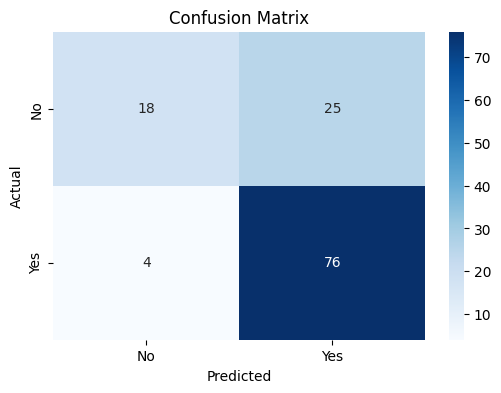

In [ ]:
#Confusion Matrix shows how many correct/incorrect predictions were made.
#Heatmap visualization makes it easier to interpret.

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

- annot=True: Displays the values inside the matrix.
- fmt='d': Formats values as integers.
- cmap='Blues': Uses shades of blue to color the heatmap.
- xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes']
- Labels X-axis (Predicted) & Y-axis (Actual) as "No" (Not Approved) & "Yes" (Approved).


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[18, 25],
       [ 4, 76]])

- Dark blue cells represent correct predictions (True Positives & True Negatives).
- Lighter blue cells represent incorrect predictions (False Positives & False Negatives).

- True Negatives (TN) = conf_matrix[0,0] = 18 → Model correctly predicted "No Loan Approval."
- False Positives (FP) = conf_matrix[0,1] = 25  → Model incorrectly predicted "Loan Approved" when it should be "No."
- False Negatives (FN) = conf_matrix[1,0] = 4 → Model incorrectly predicted "No Loan Approval" when it should be "Yes."
- True Positives (TP) = conf_matrix[1,1] = 76 → Model correctly predicted "Loan Approved."








- The model is likely good at identifying loan
applicants who are likely to be approved (high TP rate).
- The model seems to have a moderate FP rate, suggesting that it might approve loans for some individuals who might default. Further investigation might be needed to understand the characteristics of these incorrectly classified cases.
- The FN rate could be important if the business goal is to minimize missed opportunities (loan rejections for applicants who would have repaid).
